# 자연어 처리, NLP(Natural Language Processing)
### KoNLPy 패키지
> tag Package

- Hannanum Class
- Kkma Class
- Komoran Class
- Mecab Class
- Twitter Class       →    Okt

In [1]:
from IPython.display import Image as Show

In [2]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

### 한글 자연어 처리 기초

In [12]:
text_0 = u'한국어 분석을 시작합니다. 재미있어요'
text_1 = u'나는 이제 너 없이도 너를 좋아할 수 있다.'
text_2 = u'순간이 시간이 되고, 시간이 세월이 되고, 세월은 추억이 된다.'
text_3 = u'''
    자신의 능력을 감추지 마라. 
    재능은 쓰라고 주어진 것이다. 
    그늘속의 해시계가 무슨 소용이랴.'
'''
text_4 = u'''
    If I only had an hour to chop down a tree, 
    I would spend the first 45 minutes sharpening my axe.
    만일 내게 나무를 베기 위해 한 시간만 주어진다면, 
    우선 나는 도끼를 가는데 45분을 쓸 것이다.'
    - 에이브러햄 링컨
'''
text_5 = u'''
아름답지만 다소 복잡하기도한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다.
KoNLPy는 파이썬 프로그래밍 언어로 사용할 수 있도록 만들어졌는데, 
그것은 파이썬이 간결하고 우아한 문법구조, 강력한 스트링 연산 기능을 가지고 있을 뿐 아니라 
크롤링, 웹프로그래밍, 그리고 데이터 분석을 수행할 수 있는 다양한 패키지를 사용할 수 있는 언어이기 때문입니다.
'''

text_6 = u'''
하늘아래 땅이있고 그위에 내가있으니
어디인들 이내몸 둘곳이야 없으리
하루해가 저문다고 울터이냐 그리도 내가 작더냐
별이 지는 저 산넘어 내 그리 쉬어 가리라
바람아 불어라 이내몸을 날려 주려마
하늘아 구름아 내몸 실어 떠나 가련다

해가지고 달이뜨고 그안에 내가숨쉬니
어디인들 이내몸 갈곳이야 없으리
작은것을 사랑하며 살터이다 친구를 사랑하리라
말이없는 저들녘에 내님을 그려보련다
바람아 불어라 이내몸을 날려주려마
하늘아 구름아 내몸실어 떠나가련다
바람아 불어라 이내몸을 날려주려마
하늘아 구름아 내몸실어 떠나가련다
'''

cool_sentences = [ text_0, text_1, text_2, text_3, text_4, text_5, text_6 ]

### Sentence Analysis

In [13]:
selected_text = cool_sentences[-1]
print(selected_text.strip())

하늘아래 땅이있고 그위에 내가있으니
어디인들 이내몸 둘곳이야 없으리
하루해가 저문다고 울터이냐 그리도 내가 작더냐
별이 지는 저 산넘어 내 그리 쉬어 가리라
바람아 불어라 이내몸을 날려 주려마
하늘아 구름아 내몸 실어 떠나 가련다

해가지고 달이뜨고 그안에 내가숨쉬니
어디인들 이내몸 갈곳이야 없으리
작은것을 사랑하며 살터이다 친구를 사랑하리라
말이없는 저들녘에 내님을 그려보련다
바람아 불어라 이내몸을 날려주려마
하늘아 구름아 내몸실어 떠나가련다
바람아 불어라 이내몸을 날려주려마
하늘아 구름아 내몸실어 떠나가련다


In [14]:
selected_text = selected_text.replace('\n', ' ')
selected_text = selected_text.replace('\t', ' ')
selected_text = selected_text.replace('  ', ' ')
selected_text = selected_text.strip()
selected_text

'하늘아래 땅이있고 그위에 내가있으니 어디인들 이내몸 둘곳이야 없으리 하루해가 저문다고 울터이냐 그리도 내가 작더냐 별이 지는 저 산넘어 내 그리 쉬어 가리라 바람아 불어라 이내몸을 날려 주려마 하늘아 구름아 내몸 실어 떠나 가련다 해가지고 달이뜨고 그안에 내가숨쉬니 어디인들 이내몸 갈곳이야 없으리 작은것을 사랑하며 살터이다 친구를 사랑하리라 말이없는 저들녘에 내님을 그려보련다 바람아 불어라 이내몸을 날려주려마 하늘아 구름아 내몸실어 떠나가련다 바람아 불어라 이내몸을 날려주려마 하늘아 구름아 내몸실어 떠나가련다'

In [15]:
print('문자열 총 길이 : {}            '.format(len(selected_text)))
print('문자열 총 길이 : {} (공백제외) '.format(len(selected_text.replace(' ',''))))
print('문자열 단어 수 : {}           '.format(len(selected_text.split())))

문자열 총 길이 : 287            
문자열 총 길이 : 222 (공백제외) 
문자열 단어 수 : 66           


In [18]:
print('문자열 단어 발생 빈도 ')
frequency = dict()

for word in selected_text.split(' '):
    if word in frequency:
        frequency[word] += 1
    else:
        frequency[word]  = 1
word = list(frequency.keys())
word_cnt = list(frequency.values())

frequency

문자열 단어 발생 빈도 


{'하늘아래': 1,
 '땅이있고': 1,
 '그위에': 1,
 '내가있으니': 1,
 '어디인들': 2,
 '이내몸': 2,
 '둘곳이야': 1,
 '없으리': 2,
 '하루해가': 1,
 '저문다고': 1,
 '울터이냐': 1,
 '그리도': 1,
 '내가': 1,
 '작더냐': 1,
 '별이': 1,
 '지는': 1,
 '저': 1,
 '산넘어': 1,
 '내': 1,
 '그리': 1,
 '쉬어': 1,
 '가리라': 1,
 '바람아': 3,
 '불어라': 3,
 '이내몸을': 3,
 '날려': 1,
 '주려마': 1,
 '하늘아': 3,
 '구름아': 3,
 '내몸': 1,
 '실어': 1,
 '떠나': 1,
 '가련다': 1,
 '해가지고': 1,
 '달이뜨고': 1,
 '그안에': 1,
 '내가숨쉬니': 1,
 '갈곳이야': 1,
 '작은것을': 1,
 '사랑하며': 1,
 '살터이다': 1,
 '친구를': 1,
 '사랑하리라': 1,
 '말이없는': 1,
 '저들녘에': 1,
 '내님을': 1,
 '그려보련다': 1,
 '날려주려마': 2,
 '내몸실어': 2,
 '떠나가련다': 2}

In [19]:
while bool(word):
    m = min(word_cnt)
    print(m, end=' ')
#     print(word.pop(word_cnt.index(m)))
    print(word.pop(word_cnt.index(m)), end=' : ')
    print(word)
    word_cnt.remove(m)

1 하늘아래 : ['땅이있고', '그위에', '내가있으니', '어디인들', '이내몸', '둘곳이야', '없으리', '하루해가', '저문다고', '울터이냐', '그리도', '내가', '작더냐', '별이', '지는', '저', '산넘어', '내', '그리', '쉬어', '가리라', '바람아', '불어라', '이내몸을', '날려', '주려마', '하늘아', '구름아', '내몸', '실어', '떠나', '가련다', '해가지고', '달이뜨고', '그안에', '내가숨쉬니', '갈곳이야', '작은것을', '사랑하며', '살터이다', '친구를', '사랑하리라', '말이없는', '저들녘에', '내님을', '그려보련다', '날려주려마', '내몸실어', '떠나가련다']
1 땅이있고 : ['그위에', '내가있으니', '어디인들', '이내몸', '둘곳이야', '없으리', '하루해가', '저문다고', '울터이냐', '그리도', '내가', '작더냐', '별이', '지는', '저', '산넘어', '내', '그리', '쉬어', '가리라', '바람아', '불어라', '이내몸을', '날려', '주려마', '하늘아', '구름아', '내몸', '실어', '떠나', '가련다', '해가지고', '달이뜨고', '그안에', '내가숨쉬니', '갈곳이야', '작은것을', '사랑하며', '살터이다', '친구를', '사랑하리라', '말이없는', '저들녘에', '내님을', '그려보련다', '날려주려마', '내몸실어', '떠나가련다']
1 그위에 : ['내가있으니', '어디인들', '이내몸', '둘곳이야', '없으리', '하루해가', '저문다고', '울터이냐', '그리도', '내가', '작더냐', '별이', '지는', '저', '산넘어', '내', '그리', '쉬어', '가리라', '바람아', '불어라', '이내몸을', '날려', '주려마', '하늘아', '구름아', '내몸', '실어', '떠나', '가련다', '해가지고', '달이뜨고', '그안에', '내가숨쉬니', '갈곳이야', '작은것을', '사랑하며', '살

### Performance Test

In [20]:
selected_text

'하늘아래 땅이있고 그위에 내가있으니 어디인들 이내몸 둘곳이야 없으리 하루해가 저문다고 울터이냐 그리도 내가 작더냐 별이 지는 저 산넘어 내 그리 쉬어 가리라 바람아 불어라 이내몸을 날려 주려마 하늘아 구름아 내몸 실어 떠나 가련다 해가지고 달이뜨고 그안에 내가숨쉬니 어디인들 이내몸 갈곳이야 없으리 작은것을 사랑하며 살터이다 친구를 사랑하리라 말이없는 저들녘에 내님을 그려보련다 바람아 불어라 이내몸을 날려주려마 하늘아 구름아 내몸실어 떠나가련다 바람아 불어라 이내몸을 날려주려마 하늘아 구름아 내몸실어 떠나가련다'

In [21]:
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Twitter
from konlpy.tag import Okt

from datetime import datetime

In [22]:
chk_times=  list()

In [23]:
kkma = Kkma()

start = datetime.now()
kkma.pos(selected_text)
end = datetime.now()

elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
elapsed_ms = int(elapsed.total_seconds()*1000)
print('총 계산 시간: %dms' %elapsed_ms)

chk_times.append(elapsed_ms)

총 계산 시간: 0:00:03.869388
총 계산 시간: 3869ms


In [24]:
hannanum = Hannanum()

start = datetime.now()
hannanum.pos(selected_text)
end = datetime.now()

elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
elapsed_ms = int(elapsed.total_seconds()*1000)
print('총 계산 시간: %dms' %elapsed_ms)

chk_times.append(elapsed_ms)

총 계산 시간: 0:00:00.469977
총 계산 시간: 469ms


In [25]:
t = Twitter()

start = datetime.now()
t.pos(selected_text)
end = datetime.now()

elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
elapsed_ms = int(elapsed.total_seconds()*1000)
print('총 계산 시간: %dms' %elapsed_ms)

chk_times.append(elapsed_ms)

C:\Python\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


총 계산 시간: 0:00:01.629613
총 계산 시간: 1629ms


In [26]:
okt = Okt()

start = datetime.now()
okt.pos(selected_text)
end = datetime.now()

elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
elapsed_ms = int(elapsed.total_seconds()*1000)
print('총 계산 시간: %dms' %elapsed_ms)

chk_times.append(elapsed_ms)

총 계산 시간: 0:00:00.036900
총 계산 시간: 36ms


In [27]:
import matplotlib.pyplot as plt

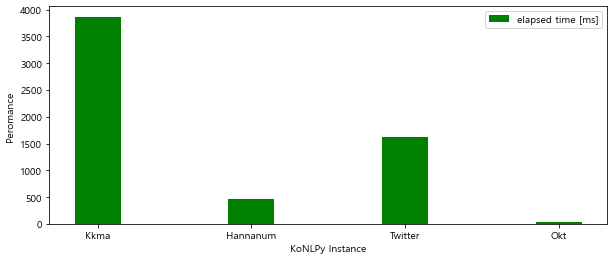

In [28]:
t = range(len(chk_times))
y = chk_times
n = [ 'Kkma', 'Hannanum', 'Twitter', 'Okt']


plt.figure(figsize=(10,4))
plt.bar(t, y, color='g', width=0.3, label='elapsed time [ms]')
plt.xlabel('KoNLPy Instance')
plt.ylabel('Peromance ')
plt.legend()
plt.xticks(t,  n)
plt.show()